In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
path = '/Users/afsanq/Documents/Python/'

In [3]:
shape_file = path + 'Shapefile/USA_Counties-shp/USA_Counties.shp'
usa = gpd.read_file(shape_file)
usa.shape

(3220, 59)

In [4]:
usa.FID.nunique()

3220

In [5]:
usa.STATE_NAME.unique()

array(['Hawaii', 'Alaska', 'California', 'Oregon', 'Nevada', 'Idaho',
       'Arizona', 'Utah', 'New Mexico', 'Texas', 'Colorado', 'Wyoming',
       'Louisiana', 'Mississippi', 'Alabama', 'Florida', 'Georgia',
       'Oklahoma', 'Kansas', 'Nebraska', 'South Dakota', 'Missouri',
       'Iowa', 'Minnesota', 'Arkansas', 'Tennessee', 'Illinois',
       'Kentucky', 'North Carolina', 'Wisconsin', 'Indiana', 'Ohio',
       'Michigan', 'Washington', 'Montana', 'North Dakota', 'Puerto Rico',
       'South Carolina', 'Virginia', 'West Virginia', 'Pennsylvania',
       'Maryland', 'New York', 'District of Columbia', 'Delaware',
       'New Jersey', 'Connecticut', 'Massachusetts', 'Rhode Island',
       'New Hampshire', 'Vermont', 'Maine'], dtype=object)

In [6]:
usa = usa[~usa['STATE_NAME'].isin(['Hawaii', 'Alaska', 'Puerto Rico', 'District of Columbia'])]

In [7]:
usa.columns

Index(['FID', 'OBJECTID', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS',
       'FIPS', 'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE',
       'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER',
       'MULT_RACE', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14',
       'AGE_15_19', 'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54',
       'AGE_55_64', 'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE',
       'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M',
       'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD',
       'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC',
       'RENTER_OCC', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12',
       'SQMI', 'Shape_Leng', 'SHAPE_Le_1', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [8]:
file = path + 'Data/countypres_2000-2016.tab'
data = pd.read_csv(file, sep='\t')
data.shape

(50524, 11)

In [9]:
data.columns

Index(['year', 'state', 'state_po', 'county', 'FIPS', 'office', 'candidate',
       'party', 'candidatevotes', 'totalvotes', 'version'],
      dtype='object')

In [10]:
def electionmap(year, df, shape):
    data = df[(df['year']==year) & df['party'].isin(['democrat', 'republican'])]
    election = pd.pivot_table(data, index=['county', 'state'], columns='party', values='candidatevotes').reset_index()
    election['results'] = election.apply(lambda row: 'D' if row['democrat'] > row['republican'] else 'R', axis=1)
    
    df_48 = pd.merge(shape, election, how='left', left_on=['NAME', 'STATE_NAME'], right_on=['county', 'state'])
    
    df_48.plot(column='results', cmap='RdBu_r', figsize=(15,15))
    plt.title(str(year), fontsize=20)
    plt.show()
    

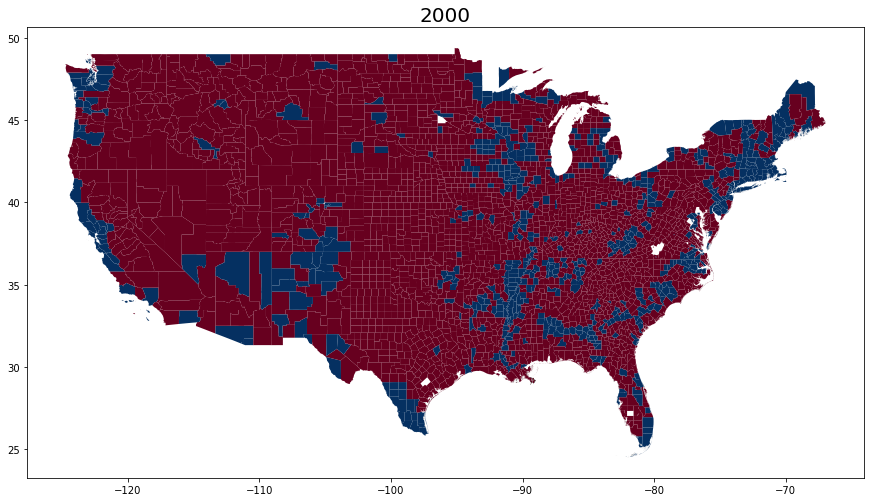

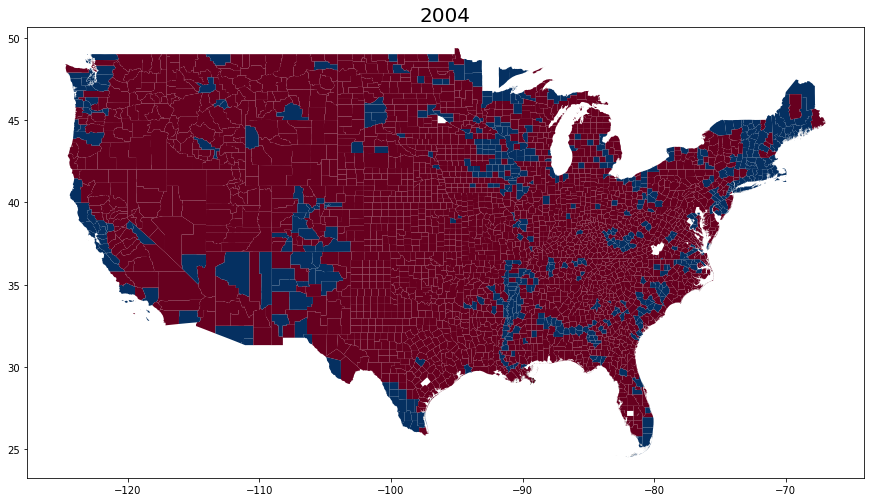

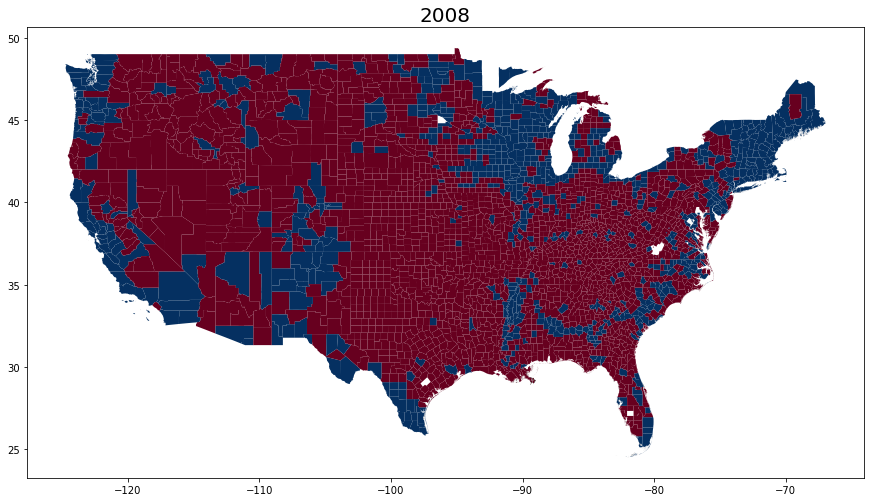

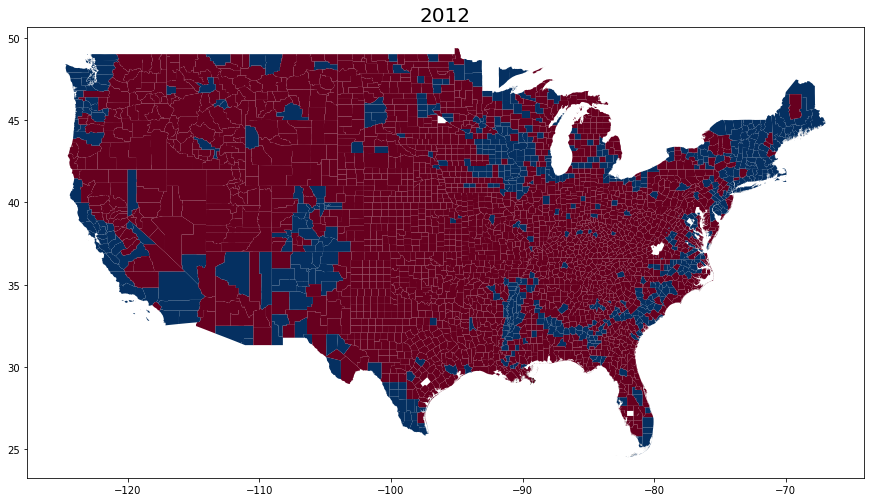

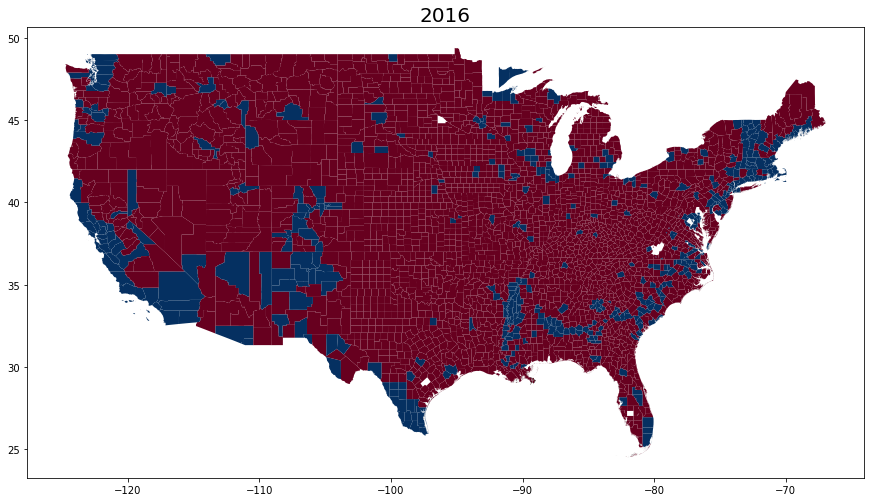

In [11]:
electionmap(2000, data, usa)
electionmap(2004, data, usa)
electionmap(2008, data, usa)
electionmap(2012, data, usa)
electionmap(2016, data, usa)

In [17]:
data.columns

Index(['year', 'state', 'state_po', 'county', 'FIPS', 'office', 'candidate',
       'party', 'candidatevotes', 'totalvotes', 'version'],
      dtype='object')

In [20]:
def electionmapny(year, df, shape):
    data = df[(df['year']==year) & df['party'].isin(['democrat', 'republican']) & (df['state']=="New York")]
    election = pd.pivot_table(data, index=['county', 'state'], columns='party', values='candidatevotes').reset_index()
    election['results'] = election.apply(lambda row: 'D' if row['democrat'] > row['republican'] else 'R', axis=1)
    
    shape = shape[shape['STATE_NAME'].isin(['New York'])]
    df_48 = pd.merge(shape, election, how='left', left_on=['NAME', 'STATE_NAME'], right_on=['county', 'state'])
    
    df_48.plot(column='results', cmap='RdBu_r', figsize=(15,15))
    plt.title(str(year), fontsize=20)
    plt.show()

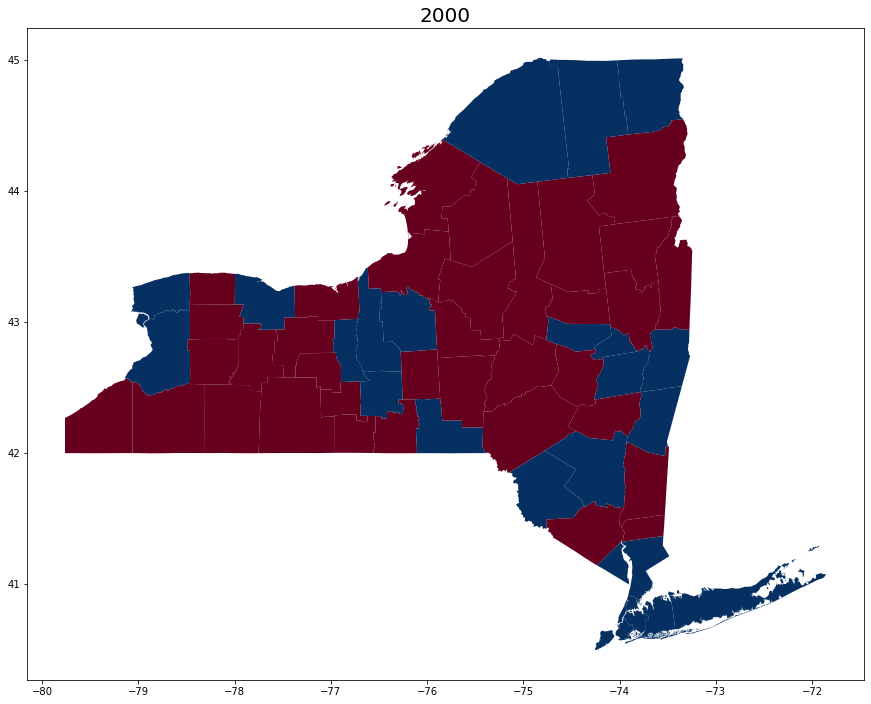

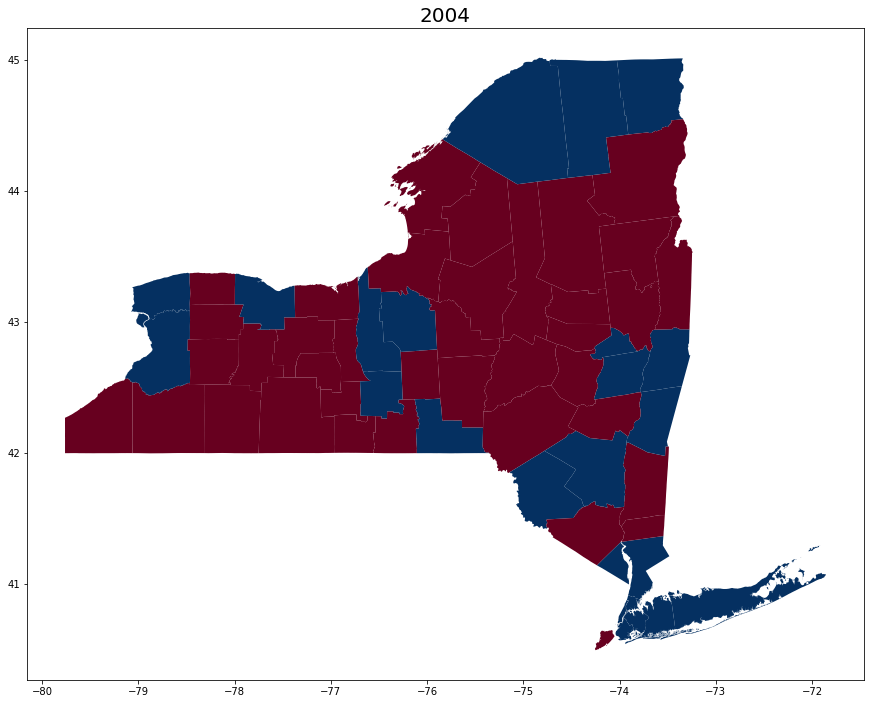

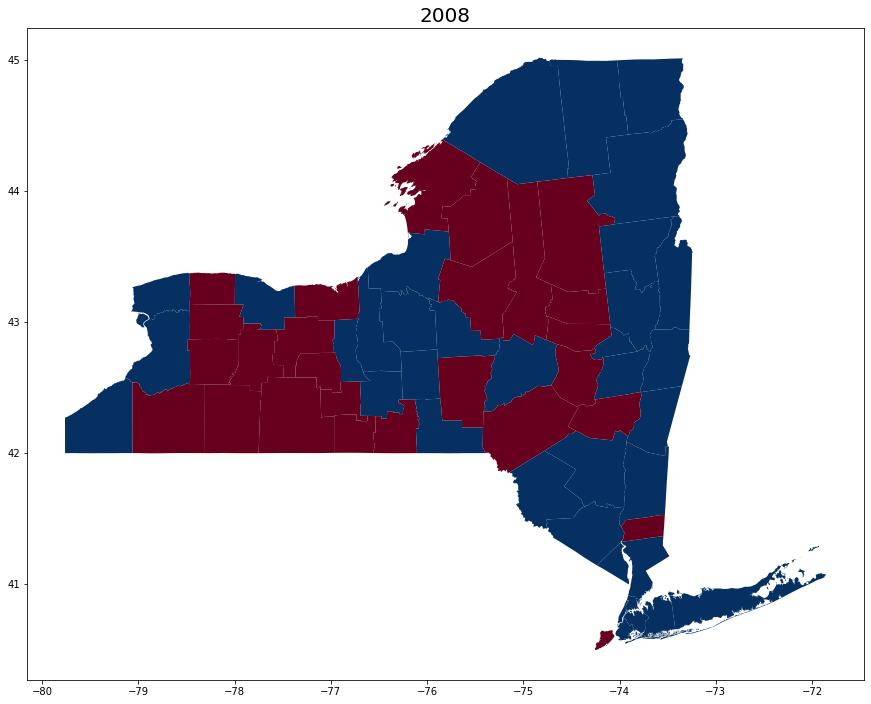

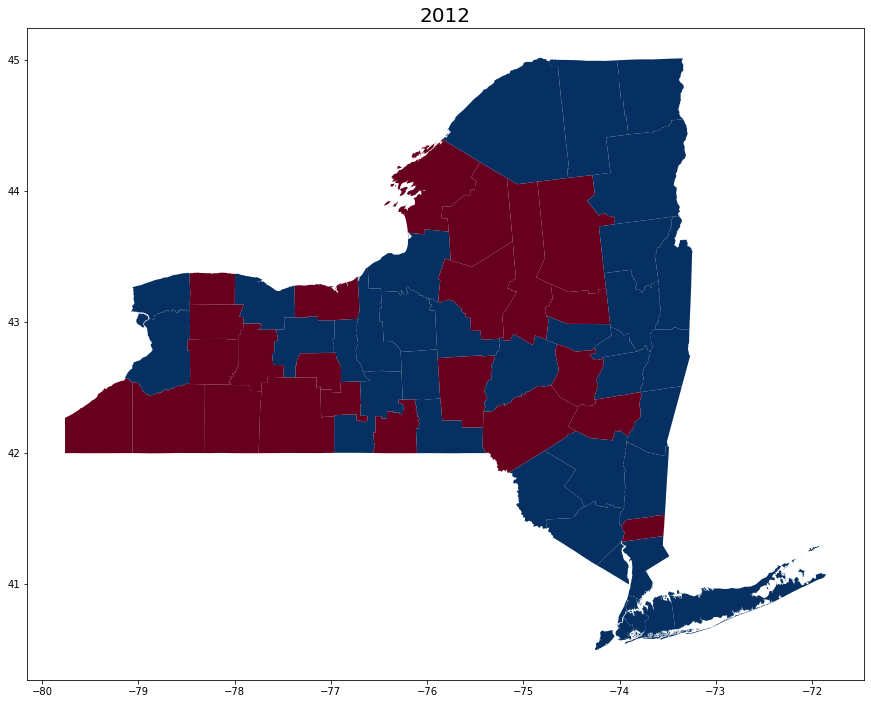

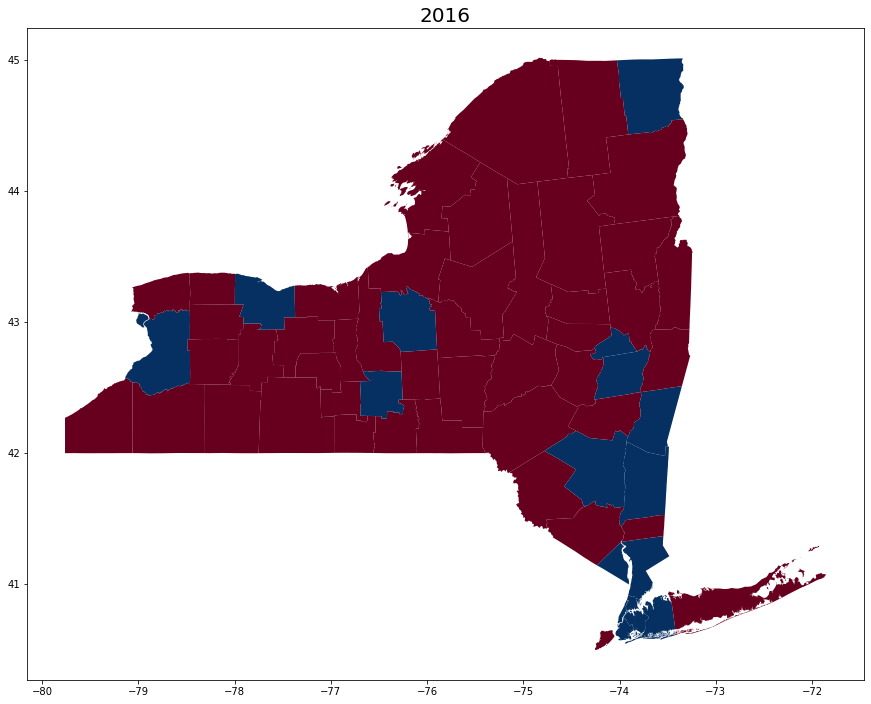

In [22]:
electionmapny(2000, data, usa)
electionmapny(2004, data, usa)
electionmapny(2008, data, usa)
electionmapny(2012, data, usa)
electionmapny(2016, data, usa)